[Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

# 第5章 Python数据分析与可视化
##  5.1 Python数据分析

###  <font color=blue>**Pandas**</font>
1. Pandas 是什么？
    - Python Data Analysis Library， Python 的第三方扩展包
    - 在 NumPy（提供高性能的矩阵运算）的基础上构建的
    - 为解决数据分析任务而创建
2. 高性能的数据操作
    - 为数据分析专门设计了三种数据结构：
        - 序列(Series)：一维数据结构
        - <font color=red>**[数据帧(DataFrame)](#id_dataframe)**</font>：二维的表格型数据结构
        - 面板(Panel)：三维数据结构
    - 可以从各种文件格式比如 CSV、JSON、SQL、Microsoft Excel 导入数据
    - 广泛应用于金融，经济，统计，分析等学术和商业领域
3. 安装与导入  
     - python -m pip install pandas 
     - import pandas as pd


###   5.1.1 Series数据结构
#### 1. Series 结构(Series 序列)  
   - pandas中的一维数据结构，类似于列表和NumPy中的ndarray对象
   - 由<font color=blue>*一组数据值（value）*</font>和<font color=red>*一组标签（index）*</font>组成，其中标签与数据值之间是一 一对应的关系。<br>
   
     1. <u>*可以根据索引读取数据*</u>
       - 索引值默认为整数，从 0 开始依次递增。
     2. <u>*可以保存任何<font color=green>数据类型（dtype）</font>*</u>，比如整数、字符串、浮点数、Python 对象等。  
     
     
     Series 是带标签的一维数组，轴标签统称为索引。
   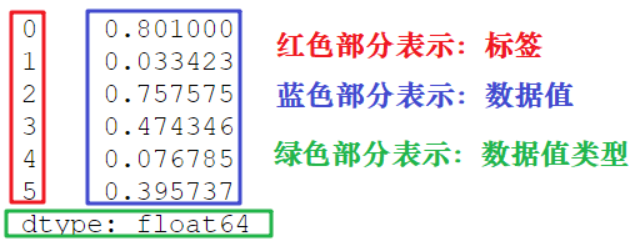
   
#### 2. 创建Series对象
   - 语法格式：<code> <font color=red size=4>**pandas.Series( data, index, dtype, copy)**</font></code>
       - 参数说明：
|**参数**|**描述**|
|:------|:------: |
|data	|支持多种数据类型创建Series对象，如：ndarray、列表、字典、常量等形式|
|index	|索引值必须是唯一的，与data的长度相同，默认为np.arange(n)
|dtype	|数据类型|
|copy	|是否复制数据，默认为false|

 索引：  
- 每个 Series 都有索引，它可以是整数、字符串、日期等类型。  
- 索引分为隐式索引和显示索引。  
            - 如果没有显式指定索引，Pandas 会自动创建一个默认的从0开始的整数索引。


In [ ]:
'''示例中没有指定任何索引，所以索引默认从 0 开始分配 ，其索引范围为 0 到len(data)-1。
   这种设置方式被称为“隐式索引”'''

# 【例5-1】创建一个Series对象。
import pandas as pd
s = pd.Series([1,3,5,9,6,8])
print(s)


从不同数据类型创建Series对象：

In [ ]:
#【例5-2】为一个地理位置数据创建Series对象。
import pandas as pd

#使用列表创建，索引值为默认值。
print('--------   列表创建series   ----------')
s1=pd.Series(['a','b','c','d'])
print(s1)

print('\n--------   字典创建series   ----------')
# 使用字典创建，索引值为字典的key值
# 可以把 dict 作为输入数据。如果没有传入索引，会按照字典的键来构造索引
s2=pd.Series({'Longitude':39, 'Latitude':116, 'Temperature':23})
print(s2)
# print('First value in s2:',s2['Longitude'])

print('\n-------- 用序列作series索引 ----------')
#'使用“显式索引”的方法定义索引标签'
#使用range函数生成的迭代序列设置索引值
s3=pd.Series([3.4, 0.8, 2.1, 0.3, 1.5], index=range(5,10))
print(s3)
# print('First value in s3:',s3[5])


#### 3. 访问Series数据对象
两种方式：
- <u>*位置索引访问（隐式索引）*</u>：使用元素自身的下标进行访问
- <u>*索引标签访问（显示索引）*</u>：通过 index 索引标签来访问或者修改元素值  
        
数据操作：
- 修改数据
- 按条件表达式筛选数据
- 增加对象成员
- 删除对象成员  

**索引访问**

In [ ]:
# 【例5-11】 P108对Series进行索引。
import numpy as np
import pandas as pd

print('-------Series------- 一维')
ser = pd.Series(np.arange(4), index=['A','B','C','D']) #构造一个Series，显式指定索引
print('ser = \n', ser)

print('-------标签索引：显式索引的操作-------')
print("ser['C']: ", ser['C'])

print('-------位置索引：隐式索引的操作-------')
print("ser[2]: ", ser[2])

【补充】
1. Series的索引和切片只针对行而言，因为它只有一列。  
2. loc 是对于显式索引的相关操作(对于标签的处理)；  
   iloc 是针对隐式索引的相关操作(对于整数下标的处理)。  
        其实 s[0:2] 与 s.iloc[0:2] 没有太大差别（显式索引也是一样），这并不说明 iloc 就没有用，它更有意义的是在DataFrame当中使用，后面会讲到。

**数据操作 - 修改数据**

In [ ]:
''' 1）修改数据'''  
# 【例5-3】对例5-2中创建的s2，将温度增加2度，设置城市为Beijing。
#温度增加2度，设置城市为Beijing
print('-------- 修改前 ----------')
print(s2)
print('-------- 修改后 ----------')
s2["City"] = "Beijing" 
s2['Temperature'] = s2['Temperature']+2
s2


**数据操作 - 筛选数据**

In [ ]:
''' 2）按条件表达式筛选数据''' 
#  【例5-4】找出【例5-2】的s3大于2的数据。
print('-------- 筛选前 ----------')
print('s3 =\n', s3)
print('-------- 筛选后 ----------')
print('s3大于2的数据 =\n', s3[s3>2] )


**数据操作 - 合并数据**

In [ ]:
''' 3）增加对象成员  
       可以看到，append合并操作不影响原Series。结果中原s2数据没有变化，新创建的s4对象接收了合并后的新数据。'''

#  两个Series对象可以通过append函数进行拼接，从而产生一个新的Series对象。

#  【例5-5】为s2添加一项湿度数据。

stiny = pd.Series({'humidity':84})
s4 = s2.append(stiny)
print('-------原Series：-------\n',s2)
print('-------新Series：append后-------\n',s4)


**数据操作 - 删除对象成员**

In [ ]:
''' 4）删除对象成员'''  
#  可以通过drop函数删除对象成员，可以删除一个或多个对象成员。drop函数也不改变原对象的内容，返回一个新的Series对象。

#  【例5-6】删除重量数据。 
print('-------- 删除前 ----------')
print('s2 =\n', s2)
print('-------- 删除后 ----------')
s2 = s2.drop('City')
print('s2 =\n', s2 )


<a id=id_dataframe></a>
###   5.1.2  DataFrame对象

#### 0. 认识DataFrame  
   是使用 Pandas 进行数据分析过程中最常用的结构之一  
- **表格型的数据结构**，包含一组有序的列
- 表格中**不同的列可以是不同的数据类型**
- 既有**行索引（index）**，也有**列索引（columns）** 
- 大小可变（结构的行数、列数允许增加或者删除）
- 它可以看作是Series组成的字典
- 可以对行和列执行算术运算
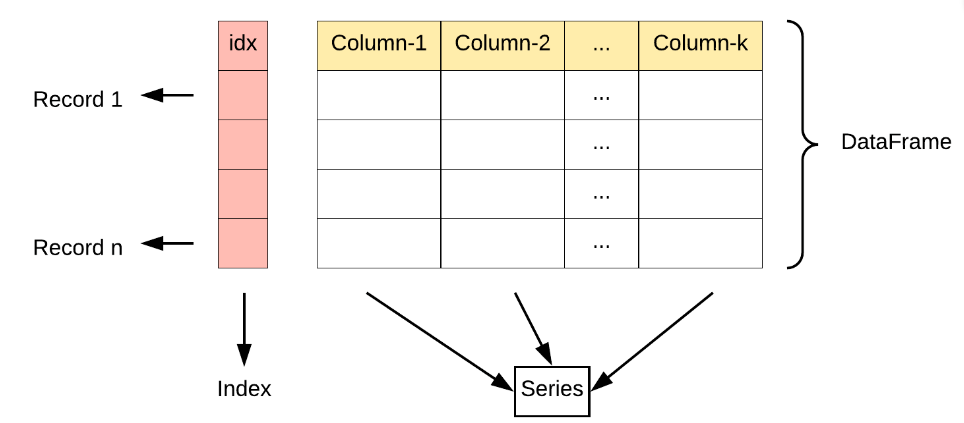
---
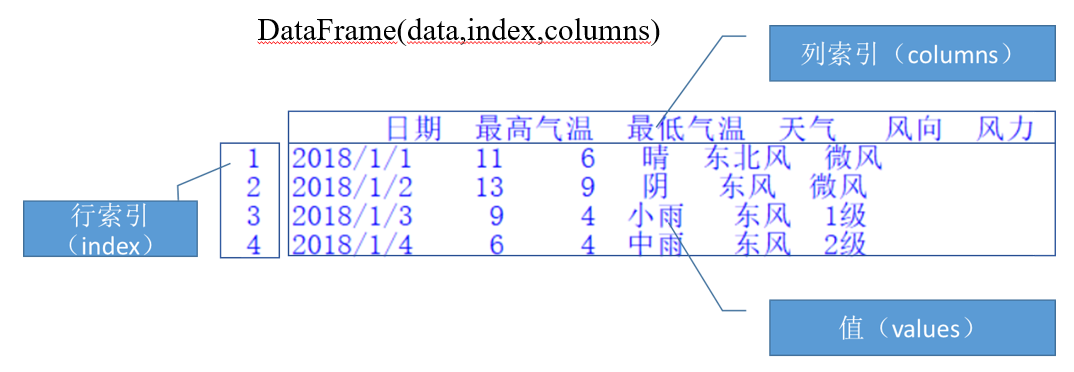


####  1. 创建DataFrame对象  
- 构造函数语法格式：  
<code> <font color=red size=4>**pandas.DataFrame( data, index, columns, dtype, copy )**</font></code>  
    - 参数说明：  
|**参数**|**描述**|
|:------|:------: |
|data	|输入的数据，可以是 list，dict，ndarray，series，标量以及一个 DataFrame。|
|index	|行标签，如果没有指定 index 值，则默认行标签是 np.arange(n)，n 代表 data 的元素个数。|
|columns|列标签，如果没有指定 columns 值，则默认列标签是 np.arange(n)。|
|dtype	|dtype表示每一列的数据类型。|
|copy	|是否复制数据 data，默认为 False。|   



- **从字典创建、从列表创建、从ndarray创建DataFrame**

In [ ]:
 ''' 1)从字典构建DataFrame
       使用字典（key/value）创建DataFrame时，其中字典的 key 为列标签 。
       '''

# 【例5-7】 从字典数据创建Dataframe。字典嵌套列表

import pandas as pd

lista = [1,2,5,7]
listb = ['a','b','c','d']
dict1 = {'col1':lista,'col2':listb}
df = pd.DataFrame(dict1)
df


In [ ]:
 ''' 2）从列表创建Dataframe 
    使用嵌套列表作为值，通过columns参数指定列名，构建Dataframe。'''

# 【例5-9】二维列表和columns构建Dataframe。
import pandas as pd
lista = [[1, 0.1, 5],
         [2, 0.5, 6],
         [4, 0.8, 5]]
a = pd.DataFrame(lista, columns = ["t1", "t2", "pl"])
a


In [ ]:
''' 3）从NumPy提供的ndarray结构创建Dataframe '''

# 【例5-10】从二维ndarray创建Dataframe
import numpy as np
import pandas as pd
a = np.array([[1,2,3], [4,5,6],[7,8,9]])  
b = pd.DataFrame(a)
b


- **从csv文件中读取数据创建**

In [ ]:
''' 4）从csv文件中读取数据到DataFrame 
    Pandas还提供读写csv文件功能，例如read_csv函数可以读取csv文件的数据，返回DataFrame对象。''' 

import pandas as pd

df = pd.read_csv('nba.csv')
df

#### 2. 访问DataFrame对象
<a id="dataframe_index"></a>
**索引和选择数据**
1. python [索引运算符](#index_operator) " [&emsp;] "
    - 按标签选取列
        - 列标签（columns）
        - 列标签的列表（columns list）
    - 按位置切片操作，可选取多行
        - `data[start:stop:step] `
---
<a id="dataframe_lociloc"></a>  

2. pandas 的两种索引方法： 
|**方法名称**|**说明**|
|:------|:------ |
|.loc[ ]	|基于标签；包括行标签(index)和列标签(columns)，可以使用 df.loc[index_name, col_name]；通过标签索引的切片方式来筛选数据时，取值左闭右闭。  |
|.iloc[ ]	|基于位置；包括行索引和列索引，可以使用 df.iloc[index_no, col_no]；通过位置索引切片选择数据时，左闭右开。位置索引都是从 0 开始。    |  </br>

    - <font color=blue size=4>*df.loc[ ]* </font>  
        **df.loc[ ] 使用标签索引**，[主要用法有](#pandas_loc)：
        - 1) 一个标量标签：只有单个标签，选择的就是一行。如：`df.loc['a']`选择的是 index 为’a’的一行。
        - 2) 标签列表：如：`df.loc[['a', 'b', 'c']]`，同样只选择行。
        - 3) 切片对象：取值包含切片的 start 和 stop。如：`df.loc['c' : 'h']` 即包含’c’行，也包含’h’行。
        - 4) 布尔数组：筛选符合某些条件的行，如：`df.loc[df.A>0.5]` 筛选出所有’A’列大于0.5的行。
        - 5) 接受两个参数，并以 ',' 分隔。第一个位置表示行，第二个位置表示列，表示选取指定的行列。
   
    - <font color=blue size=4>*df.iloc[ ]* </font>  
        **df.iloc[ ] 按位置使用整数索引**，不能使用标签索引，[主要用法有](#pandas_iloc)：
        - 1) 整数索引：只使用一个维度，则对行选择，下标从 0 开始。如：`df.iloc[5]`，选择第 6 行。
        - 2) 整数列表：如`df.iloc[[5, 1, 7]]`，选择第 6 行、第 2 行、第 8 行。  
        - 3) 切片操作：取值包含切片的 start 和 stop。数值范围与.loc不同，这里下标为 stop 的数据不被选择。<br>
                如：`df.iloc[0:3]`， 只包含第 0，1，2行，不包含第 3 行。
        - 4) 布尔数组：进行筛选，如 `df.iloc[np.array(df.A>0.5)]`，`df.iloc[list(df.A>0.5)]`。
        - 5) 接受两个参数，并以 ',' 分隔。第一个位置表示行，第二个位置表示列，表示选取指定的行列。  
---
3. ※ 索引运算符和【loc、iloc】方法的区别
    - 索引运算符 [ ] 操作只能输入一个维度，不能用逗号隔开输入两个维度。
    - .loc 和 .iloc 只输入一维时选择的是行；而 [ ] 选择的是列，并且必须使用列标签。
---    
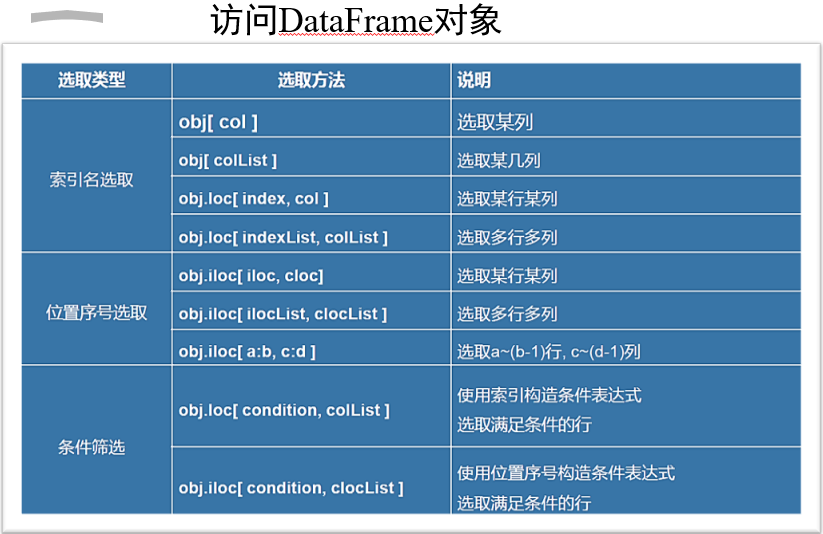

<a id="index_operator"></a>
**索引运算符**  [◀](#dataframe_index)  
- 选取列（按标签）

In [ ]:
'''访问DataFrame对象 - 索引和选择数据 - （1）索引运算符 按标签选取列
       -  data[colname] 、data[colname list]
'''

# 【例5-11】列索引选取DataFrame数据列
import numpy as np
import pandas as pd

print('---------DataFrame---------二维')
data  = pd.DataFrame(np.arange(16).reshape(4,4),
                  index=['BJ','SH','GZ','SZ'],
                  columns=['q','r','s','t']
                  )
print('data = \n', data)

print('-------取单列：列标签-------')
print("data['q'] = \n", data['q'])

print('-------取多列：列标签列表-------')
print("data[['q','t']] = \n", data[['q','t']])


<a id="index_operator_slice"></a>
**索引运算符**  [◀](#dataframe_index)  
- 选取行（按位置或标签**切片**） `data[start:stop:step]`

In [ ]:
'''访问DataFrame对象 - 索引和选择数据 - （1）索引运算符 按位置切片选取多行
       -  data[start:stop:step] 切片
'''

# 【例5-12】数据切片与筛选。
print('data = \n', data)
print()

# 按位置切片，可选取行;取值左闭右开
print('-------取多行：按位置切片------- (左闭右开)')
print(data[:2])

# 【补充】按标签切片，可选取行;取值左闭右闭
print('-------取多行：按标签切片------- (左闭右闭)')
print(data['BJ':'GZ':2])

<a id="index_operator_filter"></a>
**索引运算符**  [◀](#dataframe_index)  
- 条件筛选数据

In [ ]:
# 【例5-12】数据切片与筛选

#条件筛选进行数据过滤
data[data['s']<=10]

<a id="pandas_loc"></a>
**pandas的索引方法**  [◀](#dataframe_lociloc)  
- .loc[ ]
- **基于标签**；包括行标签（index）和列标签（columns），可以使用 `df.loc [ index_name, colomn_name ]`；
- 通过标签索引的切片方式来筛选数据时，取值左闭右闭。

In [ ]:
'''访问DataFrame对象 - 索引和选择数据 - （2）pandas 索引方法 .loc
   1个参数：取行；
   2个参数：逗号分隔，取行列。
'''

# 【例5-13】抽取指定行的数据。
import numpy as np
import pandas as pd

data  = pd.DataFrame(np.arange(16).reshape(4,4),
                  index=['BJ','SH','GZ','SZ'],
                  columns=['q','r','s','t'])
print('data = \n', data)

# 将行标签传递给 loc 函数，选取数据

print("---1) 按标签索引选取一行：data.loc['SH'] = ")
print(data.loc['SH'])
# print(type(data.loc[['SH']]))  #dataframe
# print(type(data.loc['SH']))    #series

print("---2) 按标签索引选取多行（行标签列表）：data.loc[['SH','GZ']] = ")
print(data.loc[['SH','GZ']])

print("---3) 按标签索引选取多行多列：data.loc[['SH','GZ'],['r','s']] = ")
print(data.loc[['SH','GZ'],['r','s']])


print("---4) 标签切片：data.loc['SH':'GZ','q':'r'] = ")  #前闭后闭
print(data.loc['SH':'GZ','q':'r'])


<a id="pandas_iloc"></a>
**pandas的索引方法**  [◀](#dataframe_index)  
- .iloc[ ]
- **基于位置**；包括行索引和列索引，可以使用 `df.iloc[index_no, col_no]`；
- 通过位置索引切片选择数据时，左闭右开。

In [ ]:
'''访问DataFrame对象 - 索引和选择数据 - （2）pandas 索引方法 .iloc
'''
# 【例5-1-13】抽取指定行的数据。

print('data = \n', data)

# 通过将数据行所在的索引位置（下标）传递给 iloc 函数，实现数据行选取
print("---1) 按位置选取一行：data.iloc[1] = ")
print(data.iloc[1])

print("---2) 按位置列表选取多行（行下标列表）：data.iloc[[1,3]] = ")
print(data.iloc[[1,3]])

print("---3) 按位置切片范围选取多行：data.iloc[1:3] = ")
print(data.iloc[1:3])

print("---4) 按位置切片范围选取行列：data.iloc[:-1, 1:3] = ")
print(data.iloc[:-1, 1:3])


####  3 修改DataFrame数据
1. 修改数据  
    通过赋值语句修改数据
2. 添加列  
    通过赋值语句赋值时，只要列索引名不存在，就添加新列，否则修改列值，这与字典的特性相似。  
    ※除了使用df[ ]=value的方式外，还可以使用 insert() 方法插入新列。
3. 添加行  
    使用 Pandas的concat()函数，合并新行。
4. 删除DataFrame对象的数据  
    使用drop() 函数可以按行列删除数据。   
    <font color=red size=4> <code>df.drop(索引值或索引列表，axis=0, inplace=False……)</code> </font>  
        主要参数：  
        - axis：默认为0，为行索引值或列索引列表；值为0表示删除行，值为1表示删除列。
        - inplace：逻辑值，表示操作是否对原数据生效。默认为False，产生新对象，原DataFrame对象内容不变。

In [ ]:
""" 1. 修改数据: 通过赋值语句修改数据 """

# 【例5-14】修改数组中的某个数据。
import numpy as np
import pandas as pd
data=pd.DataFrame(np.arange(16).reshape(4,4),
                  index=['BJ','SH','GZ','SZ'],
                  columns=['q','r','s','t'])

data.loc['BJ','q']=8
data.loc[:,'t']=8
data


In [ ]:
""" 2. 增加列: 赋值时，只要列索引名不存在，就添加新列 。
       除了使用df[ ]=value的方式外，还可以使用 insert() 方法插入新列。
"""
# 【例5-15】为data增加一列’u’，值为9。
data['u']=9

# 【补充】数值4代表插入到columns列表的索引位置
# data.insert(4, column='v',value=[10,11,12,13])

data


In [ ]:
""" 3. 合并添加数据: 使用Pandas的concat()方法，合并新行"""
import pandas as pd
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])
#在df的行末追加新数据行
df3 = pd.concat([df, df2], ignore_index=True)
df3

# df3 = pd.concat([df, df2])
# df3


In [ ]:
""" 4. 删除DataFrame对象的数据: Drop函数可以按行列删除数据 """

# 【例5-16】DataFrame对象的行列删除操作。
import numpy as np
import pandas as pd
data=pd.DataFrame(np.arange(16).reshape(4,4),
                  index=['BJ','SH','GZ','SZ'],
                  columns=['q','r','s','t'])

print('---删除前data = \n', data)

dt1=data.drop('SZ',axis=0)      #删除index值为"SZ"的行
print('---删除"SZ"行：dt1 = \n', dt1)

dt2=data.drop(["q","t"],axis=1)  # 删除"q","t"列
print('---删除"q","t"列：dt2 = \n', dt2)

data.drop('SZ',inplace=True)    #从原数据中删除一行
print('---删除"SZ"行后（inplace=True）：data = \n', data)

####  4 汇总和描述性统计计算
- Pandas的Serise对象和DataFrame对象都继承了NumPy的统计函数，拥有常用的数学和统计方法，可以对一列或多列数据进行统计分析。 
- 常用的描述和汇总统计函数：
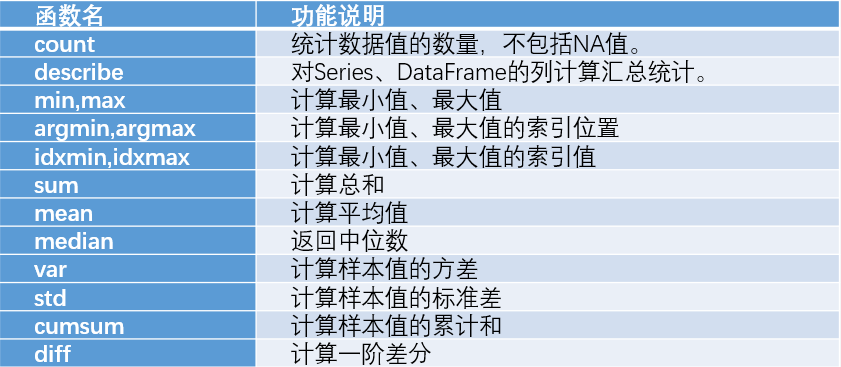
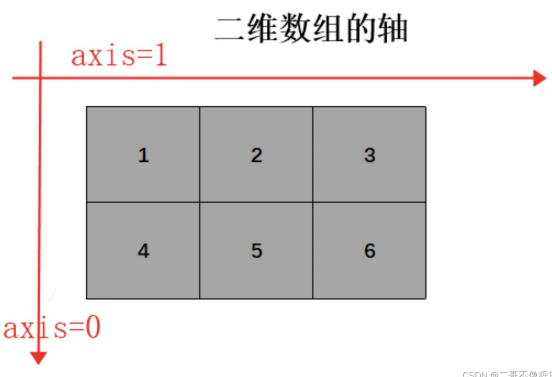

In [ ]:
# 【例5-17】一个简单的dataframe。
import numpy as np
import pandas as pd
df=pd.DataFrame(np.arange(16).reshape(4,4),
                  index=['BJ','SH','GZ','SZ'],
                  columns=['q','r','s','t'])
print('---data = \n', df)

# dataframe的跨行用0轴表示，跨列用1轴表示。默认按0轴求和：
print('---df.sum() = \n', df.sum())    # 或 df.sum(axis=0) 

# 按1轴求平均
print('---df.mean(axis=1)= \n', df.mean(axis=1) )

In [ ]:
'''dataframe ？？？'''
#  文本分析，对英文句子进行基本的单词频率提取。
# 【5-18】综合示例——英文分词

#使用变量p保存英文句子
p='life can be good,life can be sad,life is mostly cheerful,but sometimes sad.'
pList=p.split() #使用split()函数进行分割
pdict={}
print(pList)

#对分割后的词语进行统计
for item in pList: 
    if item[-1] in ',.':
        item=item[:-1]
    if item not in  pdict:
        pdict[item]=1
    else:
        pdict[item]+=1
print(pdict)


####  5 分组统计
- 数据分析中，经常需要将数据根据一个或多个字段划分为不同的组（group）进行分析
- 分组函数：groupby()
- 组内统计：计数、求和、求均值、求方差等

In [ ]:
# 【例5-19】-1 对电影评分数据集合IMDB300进行处理，按职业进行分组，统计各职业的用户人数。
'''读文件：
     header=None  没有标题行
     names 指定List of column names to use. 
'''

import pandas as pd
# f = open('score.txt',encoding='UTF-8')
# df = pd.read_csv(f,
df = pd.read_csv('score.txt',encoding='UTF-8', 
                 sep='\t', header=None, names=['Index','uNo','uAge','uOccup', 'filmNo', 'filmName','url','score','timestamp'])
# f.close()
df


In [ ]:
#【例5-19】-2 对电影评分数据集合IMDB300进行处理，按职业进行分组，统计各职业的用户人数。

'''分析：
     按职业进行分组，可以使用groupby('uOccup')，
     groupby的size方法可以返回组大小（Series结构）。
'''

#分组统计
df.groupby('uOccup').size()  #查看组的大小


In [ ]:
#分组统计
df.groupby('uOccup').count() #查看对组内全部特征的计数结果

In [ ]:
#分组统计
df.groupby('uOccup')['filmName'].count() #查看单个特征的计数结果

**分组统计总结 size() 和 count()：**
- size() 计算的是记录的个数，count() 计算的是 value（数值）的个数，
- size计数时包含NaN值，而count不包含NaN值

In [ ]:
#【例5-20】统计不同职业观众对电影的平均打分。
'''对分组计算 - 统计某一特征的平均值。
   在计算平均值时，只能计算数值类型的特征，而字符等类型的特征将被忽略。
'''

#计算组内score平均值
df.groupby('uOccup')['score'].mean()


In [ ]:
#【例5-21】统计不同职业观众的平均年龄。
'''先按特征筛选，多个列表签分组，再进行统计'''

df[['uAge','uOccup']].groupby('uOccup').mean()


In [ ]:
# 【例5-22】统计不同职业观众各自的人数。
''' 如果只想知道某个特征中不同值的计数，
    如各职业观众分别有多少人，也可以无需分组，直接使用dataframe提供的value_counts()函数。'''

df['uOccup'].value_counts()


In [4]:
'''
分组统计总结 size() 和 count()
- size() 计算的是记录的个数，count() 计算的是 value（数值）的个数，
- size计数时包含NaN值，而count不包含NaN值
'''
import numpy as np
import pandas as pd
dfSC = pd.DataFrame({"Name":["Alice", "Bob", "Mallory", "Mallory", "Bob" , 
                           "Mallory"],"City":["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"], 
                           "Val":[4,3,3,np.nan,np.nan,4]})

print(dfSC)


df1 = dfSC.groupby(["City"], as_index=False).count()  # count把每一列的值都返回出现的次数
print('--------------------------groupby([City]).count()')
print(df1)

df1 = dfSC.groupby(["City"], as_index=False).size()  # size只返回分组字段的出现次数
print('--------------------------.groupby(["City"]).size()')
print(df1)



      Name      City  Val
0    Alice   Seattle  4.0
1      Bob   Seattle  3.0
2  Mallory  Portland  3.0
3  Mallory   Seattle  NaN
4      Bob   Seattle  NaN
5  Mallory  Portland  4.0
--------------------------groupby([City]).count()
       City  Name  Val
0  Portland     2    2
1   Seattle     4    2
--------------------------.groupby(["City"]).size()
       City  size
0  Portland     2
1   Seattle     4
